# Convolutional Neural Network

### Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
   

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
dataset_folder = "C:\\Users\\preya\\Downloads\\Project - CNN for Image Classification (1)\\Project - CNN for Image Classification\\dataset"

if os.path.exists(dataset_folder):
    print("Path exists!")
else:
    print("Path does not exist!")
    
train_dir = os.path.join(dataset_folder, 'training_set')

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Load the training set
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')


Path exists!
Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [8]:
test_dir = os.path.join(dataset_folder, 'test_set')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [14]:
model = Sequential()

### Step 1 - Convolution

In [17]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))


C:\Users\preya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding a second convolutional layer

In [23]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [26]:
model.add(Flatten())

### Step 4 - Full Connection

In [29]:
model.add(Dense(units=128, activation='relu'))
 

### Step 5 - Output Layer

In [32]:
model.add(Dense(units=1, activation='sigmoid'))  

## Part 3 - Training the CNN

### Compiling the CNN

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [42]:
model.fit(train_set, steps_per_epoch=100, epochs=25, validation_data=test_set, validation_steps=25)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.8062 - loss: 0.4123 - val_accuracy: 0.7788 - val_loss: 0.4880
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.8105 - loss: 0.4160 - val_accuracy: 0.7725 - val_loss: 0.4984
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8309 - loss: 0.4036 - val_accuracy: 0.8175 - val_loss: 0.4043
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.8224 - loss: 0.4045 - val_accuracy: 0.8188 - val_loss: 0.4172
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.8153 - loss: 0.4021 - val_accuracy: 0.7600 - val_loss: 0.5213
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8107 - loss: 0.3907 - val_accuracy: 0.7900 - val_loss: 0.4476
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.8196 - loss: 0.3896 - val_accuracy: 0.7775 - val_loss: 0.4502
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8339 - loss: 0.3

## Part 4 - Making a single prediction

In [95]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
test_image = image.load_img("C:\\Users\\preya\\Downloads\\Project - CNN for Image Classification (1)\\Project - CNN for Image Classification\\dataset\\single_prediction\cat_or_dog_1.jpg", target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class
result = model.predict(test_image)

# Output the prediction result
if result[0][0] == 0:
    prediction = 'cat'  # Class 0 is cat
else:
    prediction = 'dog'  # Class 1 is dog
print(f'Prediction: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: dog


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\preya\AppData\Local\Temp\ipykernel_17080\3973676288.py:5: SyntaxWarning: invalid escape sequence '\c'
  test_image = image.load_img("C:\\Users\\preya\\Downloads\\Project - CNN for Image Classification (1)\\Project - CNN for Image Classification\\dataset\\single_prediction\cat_or_dog_1.jpg", target_size=(64, 64))


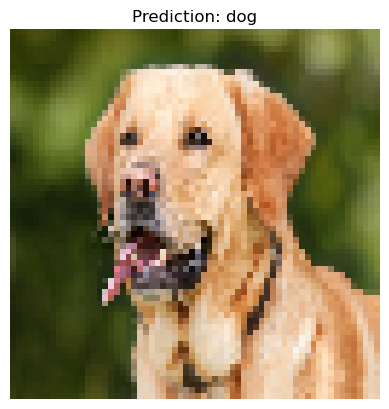

In [97]:
import matplotlib.pyplot as plt

# Convert the image back to original format (for proper display)
test_image_display = test_image[0]  # Get the image back from the batch dimension
test_image_display = np.clip(test_image_display, 0, 255)  # Clip pixel values to ensure they're between 0 and 255

# Display the image using matplotlib
plt.imshow(test_image_display.astype('uint8'))  # Convert to uint8 for displaying
plt.axis('off')  # Turn off axis for better visualization
plt.title(f"Prediction: {prediction}")  # Show the prediction in the title
plt.show()